# Wild Fire Analysis

## Motivation:
In this project, I plan to conduct an analysis of wildfires in the United States. 

The wildfires has severe impacts on human beings: 
1. Wildfires affect air quality by releasing large amounts of carbon dioxide and ozone precursors into the atmosphere. These emissions  affect climate on regional and even global scales. 
2. Wildfires affect air quality by emitting substantial amounts of harmful materials that can be even transported to populated areas far from the wildfires region.  
3. Wildfires affect the local community by creating safety issues for those who live and work near the forest.

**This analysis is based on the database that tracks large wildfires across the U.S collected by Big Local News.**

In [1]:
from mpl_toolkits.basemap import Basemap
import pandas as pd
import numpy as np
import dateutil
import matplotlib.pyplot as plt

In [46]:
columns = ['POO_LATITUDE', 'POO_LONGITUDE', 'DISCOVERY_DATE', 'POO_STATE_CODE', 'EST_IM_COST_TO_DATE']
fire_data_df = pd.read_csv('fire_reports_2014-2017.csv', usecols=columns, low_memory=False)

In [8]:
def get_year(date):
    if pd.isnull(date):
        return 0
    else:
        return dateutil.parser.parse(date).year
fire_data_df['DISCOVERY_YEAR'] = fire_data_df['DISCOVERY_DATE'].apply(get_year)
fire_data_df = fire_data_df[fire_data_df['DISCOVERY_YEAR'].between(2014, 2017)]

## Number of the wild fire is increasing

Especially in recent years, more frequent and intense wildfires are expected and reported due to the warmer and drier climate, the number increased by 100% from 2014 to 2017

Text(0.5, 1.0, 'Wild Fire per Year')

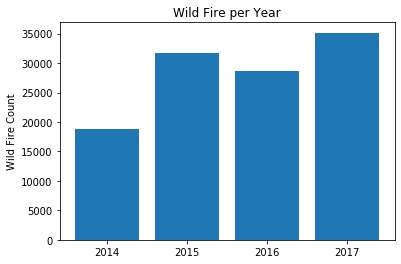

In [6]:
fire_year_count = fire_data_df.groupby('DISCOVERY_YEAR').count().reset_index()

years = fire_year_count['DISCOVERY_YEAR']
plt.bar(years, fire_year_count['DISCOVERY_DATE'], align='center')
plt.xticks(years, years)
plt.ylabel('Wild Fire Count')
plt.title('Wild Fire per Year')

## Wild fire location distribution


Let's get a general understanding of wild fire location, we can analyze the temperature，precipitation, sunshine impact based on the data from https://www.ncdc.noaa.gov/cdo-web/

In [53]:
def draw_wild_fire_location():
    plt.figure(figsize=(15,10),dpi=300)
    m = Basemap(llcrnrlon=-135,llcrnrlat=22,urcrnrlon=-64,urcrnrlat=52,projection='merc',lat_1=33,lat_2=45,lon_0=-95)
    
    m.drawcoastlines()
    m.fillcontinents(color='coral',lake_color='aqua')
    m.drawparallels(np.arange(-90., 91., 10.))
    m.drawmeridians(np.arange(-180., 181., 10.))
    m.drawmapboundary(fill_color='aqua')

    x , y = m(np.array(fire_data_df['POO_LONGITUDE']), np.array(fire_data_df['POO_LATITUDE']))
    m.plot(x,y,'g.')

    plt.title('Wild Fire Location')
    plt.show()

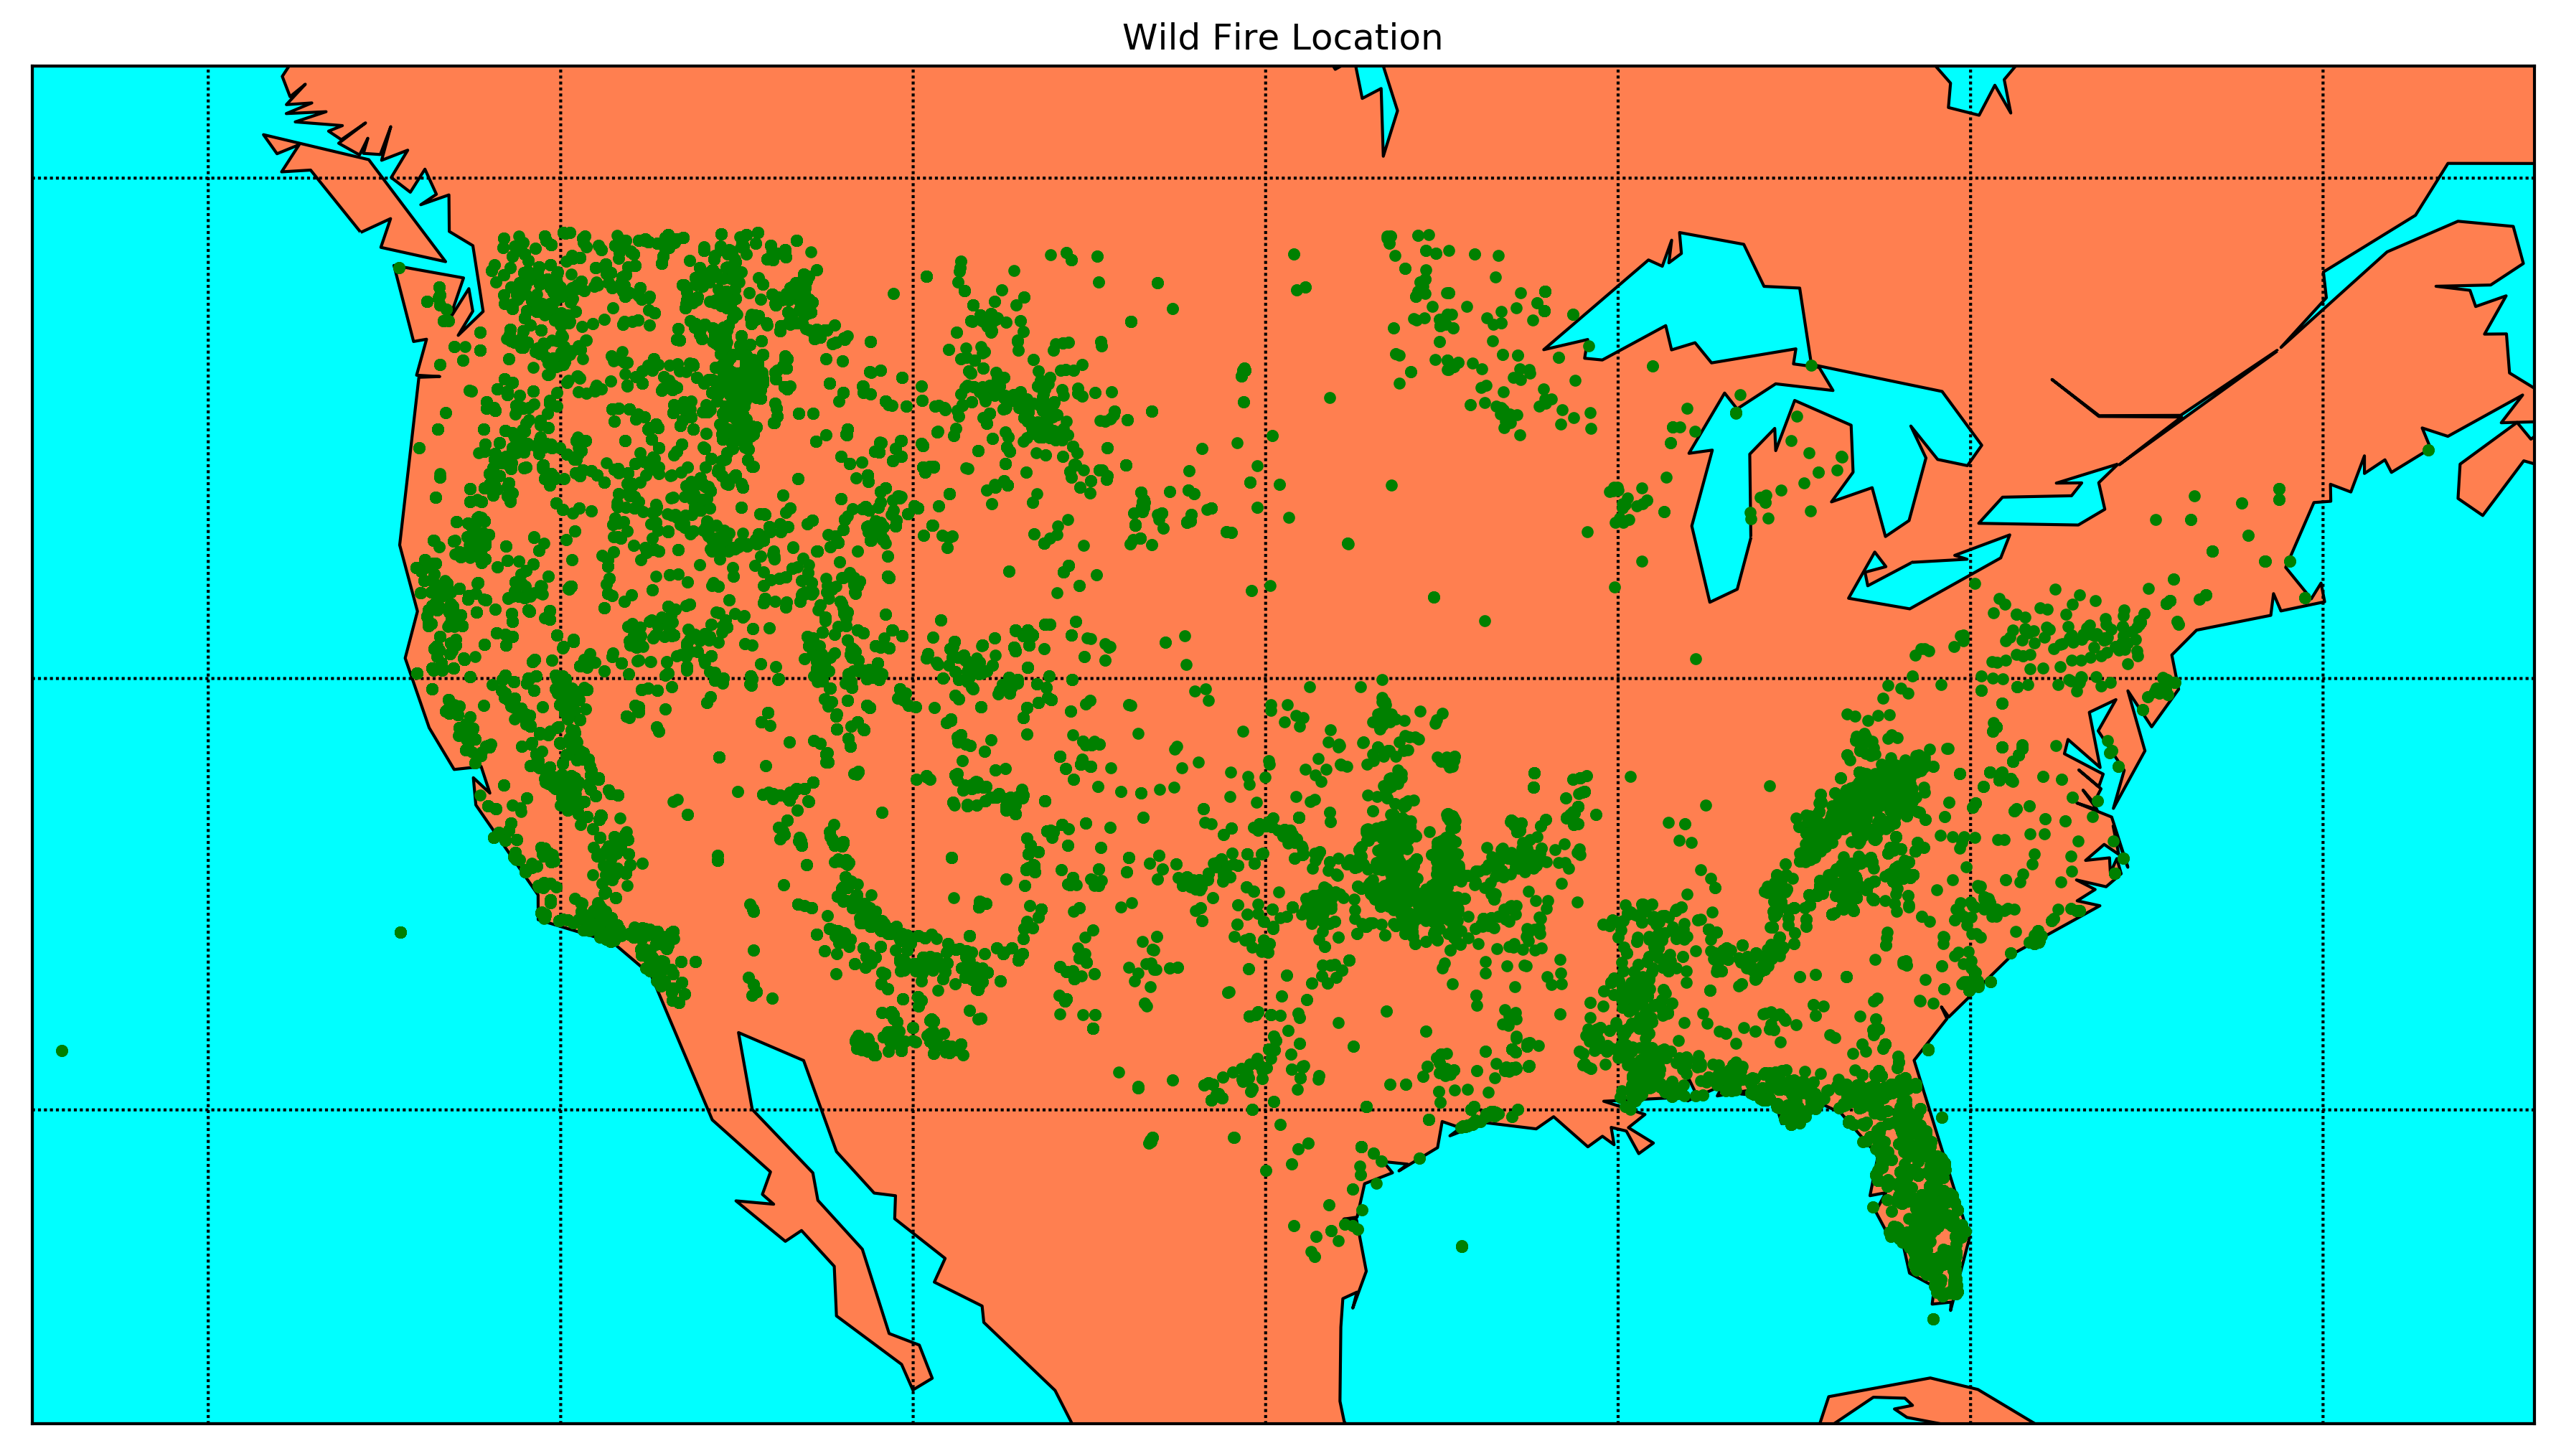

In [54]:
draw_wild_fire_location()

**Let's check the Top 5 states which have the most wild fire**

In [52]:
fire_state_count_df = fire_data_df.groupby('POO_STATE_CODE').count()
fire_state_count_df = fire_state_count_df.sort_values(by=['POO_LATITUDE'], ascending=False).reset_index()
print(fire_state_count_df['POO_STATE_CODE'].head(5))

0     6.0
1    16.0
2    30.0
3     2.0
4    41.0
Name: POO_STATE_CODE, dtype: float64


**They are California(6), Idaho(16), Montana(30), Alaska(2) and Oregon(41)**

## Wild fire cost estimation
We can get an rough estimation base on EST_IM_COST_TO_DATE column, and we can study the potential damage/impact of the fires on people who live nearby

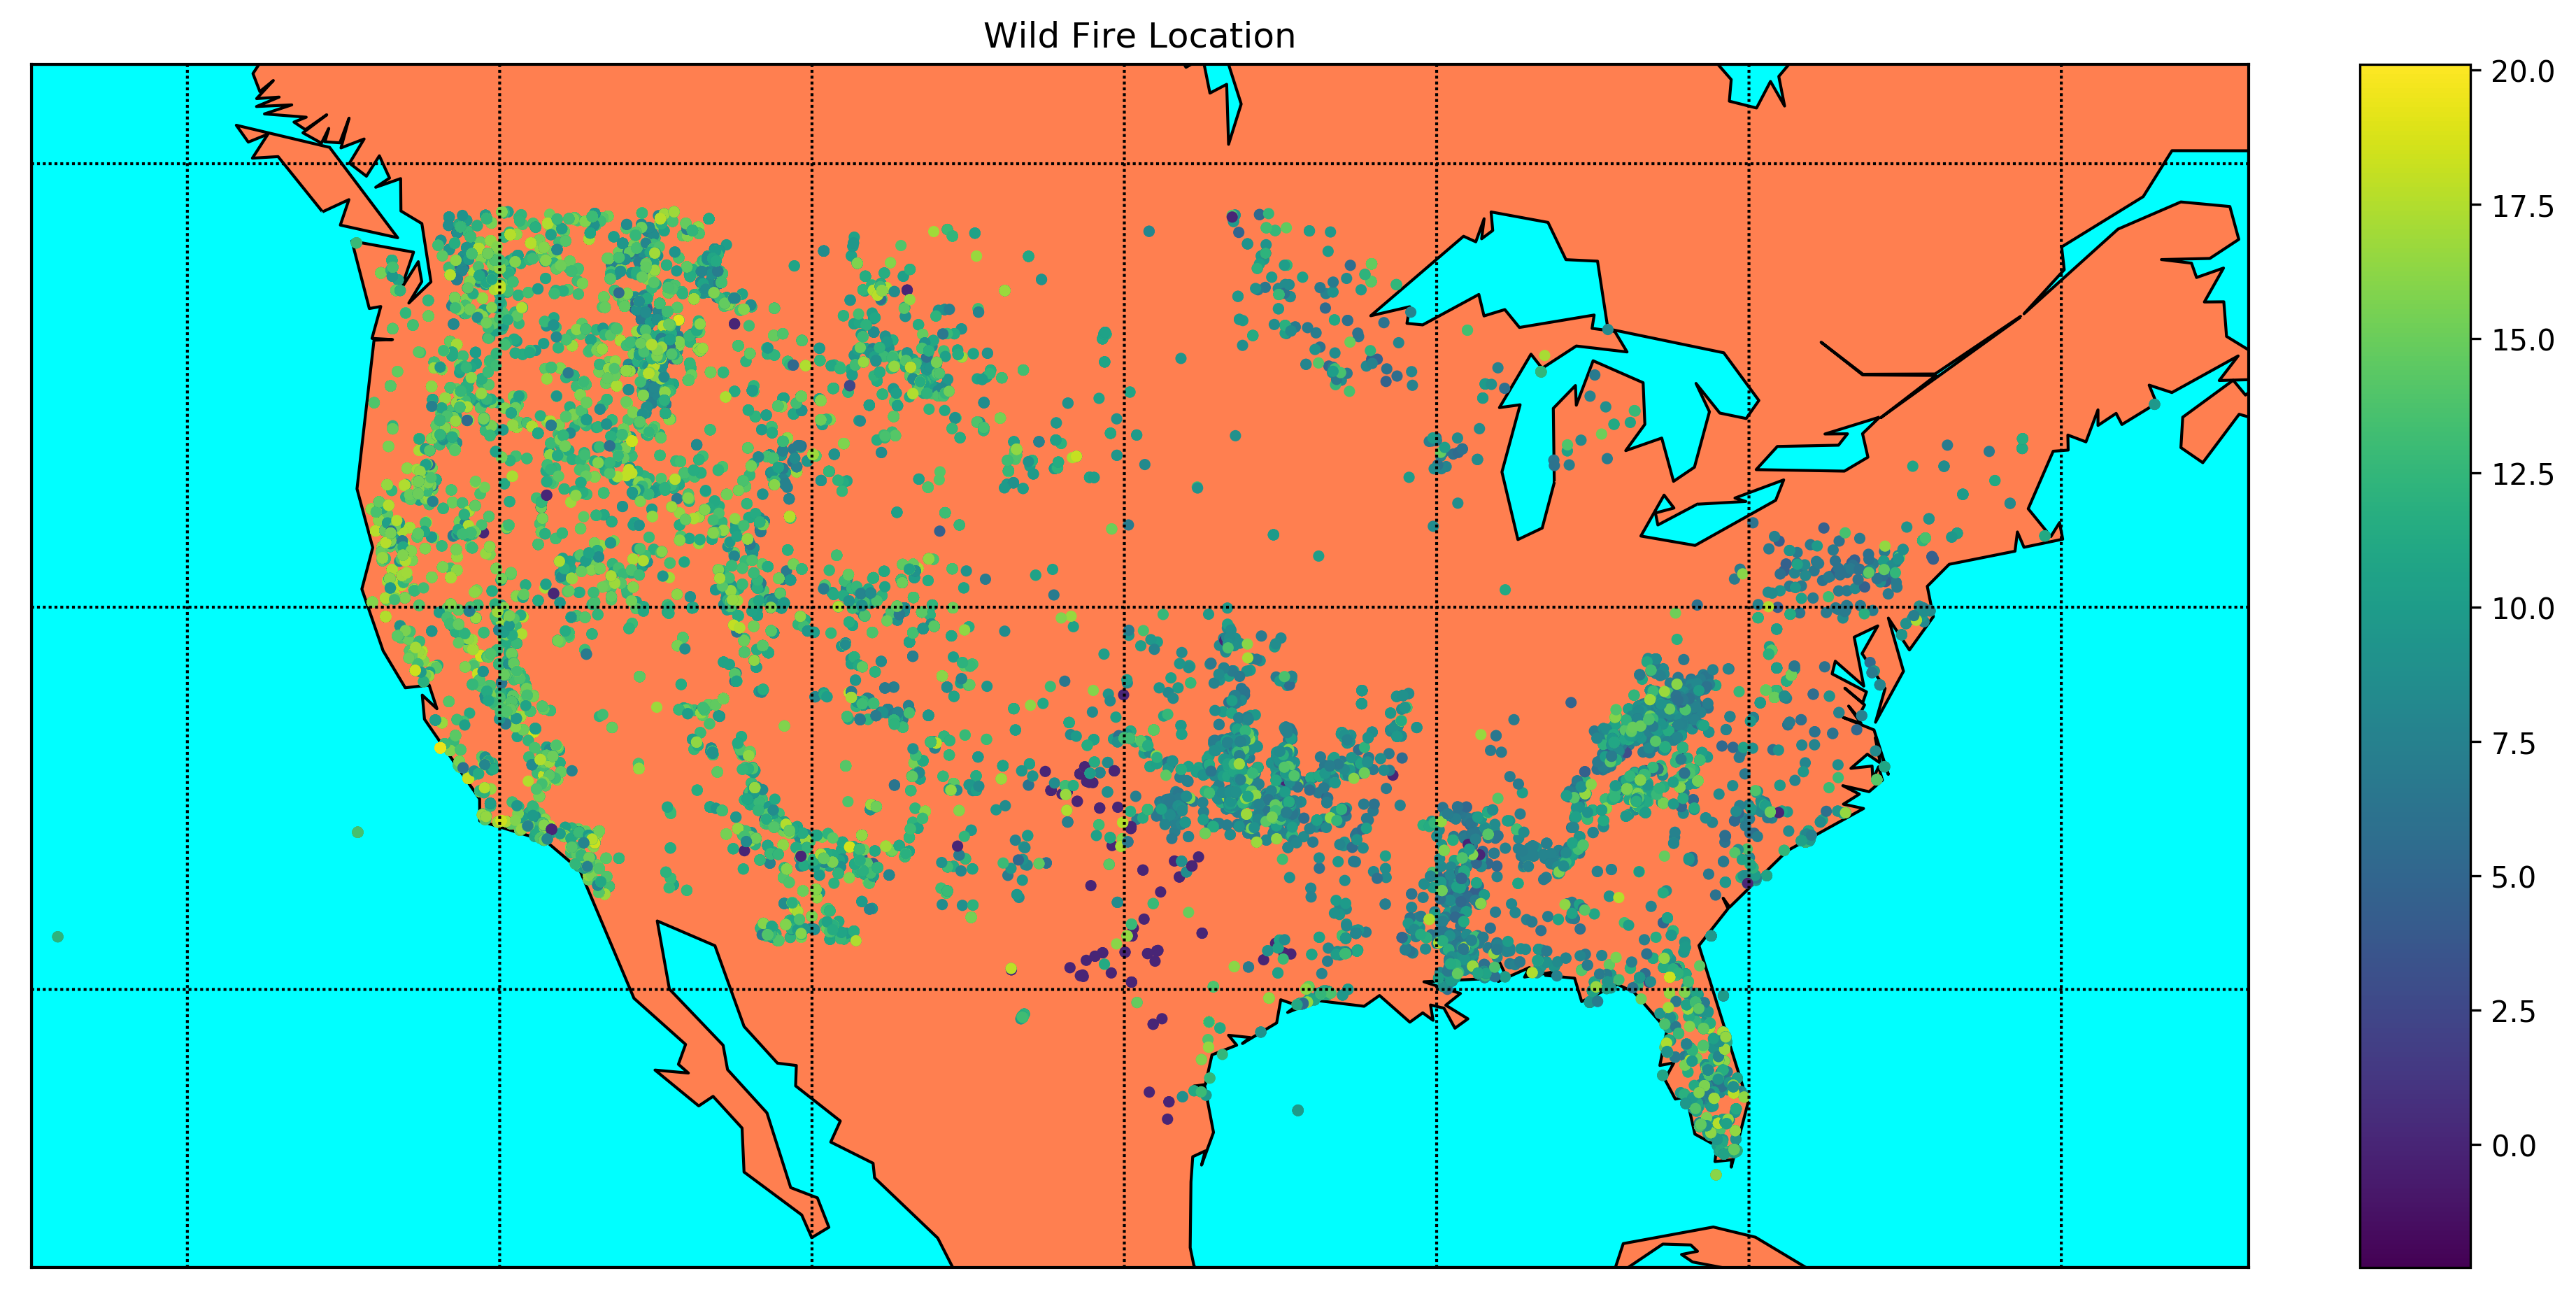

In [45]:
def draw_wild_fire_cost():
    plt.figure(figsize=(15,10),dpi=300)
    m = Basemap(llcrnrlon=-135,llcrnrlat=22,urcrnrlon=-64,urcrnrlat=52,projection='merc',lat_1=33,lat_2=45,lon_0=-95)
    
    m.drawcoastlines()
    m.fillcontinents(color='coral',lake_color='aqua')
    m.drawparallels(np.arange(-90., 91., 10.))
    m.drawmeridians(np.arange(-180., 181., 10.))
    m.drawmapboundary(fill_color='aqua')

    fire_cost_df = fire_data_df[fire_data_df['EST_IM_COST_TO_DATE'] > 0]
    x , y = m(np.array(fire_cost_df['POO_LONGITUDE']), np.array(fire_cost_df['POO_LATITUDE']))
    
    colors = np.array(np.log(fire_cost_df['EST_IM_COST_TO_DATE']))
    col = m.scatter(x, y, c=colors, marker='o', lw=0, zorder=2, s=15)
    colbar = m.colorbar(col, location='right', pad="5%")

    plt.title('Wild Fire Location')
    plt.show()
    
draw_wild_fire_cost()    